In [ ]:
#크게 상품과 브랜드로 나눠서 변수의 분포를 확인함

# 상품 EDA

## 폰트 설정

In [ ]:
# Colab에 Mecab 설치
!pip install konlpy
!pip install mecab-python
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

## 준비

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ML팀플/color_add.csv의 사본',encoding='utf-8')

In [ ]:
df.head() #주요구매연령, 주요열람연령

,Unnamed: 0,브랜드,제품명,제품코드,원가,할인가,리뷰수,링크주소,이미지,18이하_조회수,...,미상_구매수,총구매수,태그,주요조회연령,사이즈 수,색상_rgb,이미지URL,총이미지,human_ditect,컬러
0,0,필루미네이트,[무료반품] 옵티멀 베이직 셔츠-화이트[린넨＆옥스포드 선택],994588,53000,39900,10448.0,//www.musinsa.com/app/goods/994588,https://image.msscdn.net/images/goods_img/2019...,14315.0,...,5.0,26174.0,"['린넨', '린넨셔츠', '시티보이', '오버핏셔츠', '옥스포드셔츠', '셔츠'...",45.0,4.0,"222,221,227",//image.musinsa.com/images/codimap/list/202404...,https://image.msscdn.net/images/goods_img/2019...,0,화이트
1,1,무신사 스탠다드,베이식 드레스 셔츠 [화이트],983339,33900,33900,14123.0,//www.musinsa.com/app/goods/983339,https://image.msscdn.net/images/goods_img/2019...,523.0,...,3.0,16346.0,"['기본셔츠', '수트', '와이셔츠', '정장', '긴팔셔츠', 'PLUS배송',...",45.0,5.0,"5,5,5",//image.musinsa.com/images/style/list/20240409...,https://image.msscdn.net/images/goods_img/2019...,1,화이트
2,2,무신사 스탠다드,릴렉스 핏 옥스포드 셔츠 [화이트],854337,33900,30490,23232.0,//www.musinsa.com/app/goods/854337,https://image.msscdn.net/images/goods_img/2018...,1031.0,...,3.0,16459.0,"['긴팔셔츠', '남방', '기본셔츠', 'PLUS배송', '플러스배송', '아이코...",45.0,6.0,"206,205,210",//image.musinsa.com/images/codimap/list/202405...,https://image.msscdn.net/images/goods_img/2018...,1,화이트
3,3,파르티멘토,[세트][선택] 스톤 워싱 데님 셋업 블루,2524570,76800,59900,5332.0,//www.musinsa.com/app/goods/2524570,https://image.msscdn.net/images/goods_img/2022...,419.0,...,5.0,10687.0,"['셋업', '셔츠', '반바지', '바지', '와이드팬츠', '데님', '미니멀트...",45.0,3.0,"115,134,154",//image.musinsa.com/images/codimap/list/202405...,https://image.msscdn.net/images/goods_img/2022...,0,중청
4,4,유니온블루,LAUNDRY SHIRT (LAVENDER GRAY),2375962,62000,59000,11957.0,//www.musinsa.com/app/goods/2375962,https://image.msscdn.net/images/goods_img/2022...,368.0,...,2.0,10954.0,"['오버핏', '남자셔츠', '긴팔셔츠', '셔츠', '시티보이', '런드리셔츠',...",45.0,5.0,"183,186,190",//image.musinsa.com/images/codimap/list/202405...,https://image.msscdn.net/images/goods_img/2022...,1,라벤더


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    3796 non-null   int64  
 1   브랜드           3796 non-null   object 
 2   제품명           3796 non-null   object 
 3   제품코드          3796 non-null   int64  
 4   원가            3796 non-null   int64  
 5   할인가           3796 non-null   int64  
 6   리뷰수           3796 non-null   float64
 7   링크주소          3796 non-null   object 
 8   이미지           3796 non-null   object 
 9   18이하_조회수      3796 non-null   float64
 10  18이하_조회수_비율   3796 non-null   float64
 11  18이하_구매수      3796 non-null   float64
 12  18이하_구매수_비율   3796 non-null   float64
 13  19~23_조회수     3796 non-null   float64
 14  19~23_조회수_비율  3796 non-null   float64
 15  19~23_구매수     3796 non-null   float64
 16  19~23_구매수_비율  3796 non-null   float64
 17  24~28_조회수     3796 non-null   float64
 18  24~28_조회수_비율  3796 non-null 

In [ ]:
import pandas as pd

# 추출할 컬럼 목록
columns_to_extract = [
    '브랜드', '제품명', '제품코드', '원가', '할인가', '태그', '컬러',
    '사이즈 수', '총구매수','총조회수','주요열람연령','주요구매연령'
]

# 특정 컬럼만 추출
df2 = df[columns_to_extract]

In [ ]:
df2

,브랜드,제품명,제품코드,원가,할인가,태그,컬러,사이즈 수,총구매수,총조회수,주요열람연령,주요구매연령
0,필루미네이트,[무료반품] 옵티멀 베이직 셔츠-화이트[린넨＆옥스포드 선택],994588,53000,39900,"['린넨', '린넨셔츠', '시티보이', '오버핏셔츠', '옥스포드셔츠', '셔츠'...",화이트,4.0,26174.0,113993.0,AGE_19_TO_23,35.0
1,무신사 스탠다드,베이식 드레스 셔츠 [화이트],983339,33900,33900,"['기본셔츠', '수트', '와이셔츠', '정장', '긴팔셔츠', 'PLUS배송',...",화이트,5.0,16346.0,15349.0,AGE_24_TO_28,35.0
2,무신사 스탠다드,릴렉스 핏 옥스포드 셔츠 [화이트],854337,33900,30490,"['긴팔셔츠', '남방', '기본셔츠', 'PLUS배송', '플러스배송', '아이코...",화이트,6.0,16459.0,22231.0,AGE_24_TO_28,35.0
3,파르티멘토,[세트][선택] 스톤 워싱 데님 셋업 블루,2524570,76800,59900,"['셋업', '셔츠', '반바지', '바지', '와이드팬츠', '데님', '미니멀트...",중청,3.0,10687.0,14684.0,AGE_24_TO_28,35.0
4,유니온블루,LAUNDRY SHIRT (LAVENDER GRAY),2375962,62000,59000,"['오버핏', '남자셔츠', '긴팔셔츠', '셔츠', '시티보이', '런드리셔츠',...",라벤더,5.0,10954.0,36683.0,AGE_24_TO_28,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3791,알에스에스씨,FLUFF CROCHET KNIT SHIRT - PINK,3462730,139000,132000,"['니트셔츠', '니트웨어', '캐주얼셔츠', '긴팔셔츠', '셔츠', '오버핏셔츠']",핑크,2.0,24.0,843.0,AGE_24_TO_28,35.0
3792,리,포플린 오리진핏 셔츠 화이트,3447587,79000,63200,['23FW'],화이트,4.0,25.0,1170.0,AGE_24_TO_28,35.0
3793,리,우먼 오버사이즈드핏 셔츠 화이트,3447574,79000,55300,"['23FW', '우먼컬렉션', 'LEE×노윤서']",화이트,1.0,22.0,1347.0,AGE_29_TO_33,35.0
3794,에잇세컨즈,슬럽 조직 오픈칼라 셔츠 네이비 (423764LY1R),3424255,44900,20900,['에잇세컨즈클리어런스_남성'],네이비,NaN,25.0,440.0,AGE_34_TO_39,35.0


In [ ]:
df2.describe()

,제품코드,원가,할인가,사이즈 수,총구매수,총조회수,주요구매연령
count,3.796000e+03,3.796000e+03,3796.000000,3638.000000,3796.000000,3796.000000,3796.0
mean,3.088701e+06,8.151487e+04,61866.373024,3.050302,289.668335,3122.982350,35.0
std,7.437740e+05,5.662007e+04,43144.543262,1.229483,943.242485,7670.059526,0.0
min,3.758600e+05,1.980000e+04,11270.000000,0.000000,16.000000,100.000000,35.0
25%,2.662026e+06,5.400000e+04,37000.000000,2.000000,36.000000,506.000000,35.0
50%,3.235469e+06,6.900000e+04,49500.000000,3.000000,66.000000,1141.500000,35.0
75%,3.737654e+06,8.900000e+04,73087.500000,4.000000,177.000000,2897.250000,35.0
max,4.104090e+06,1.159000e+06,606000.000000,7.000000,26174.000000,206455.000000,35.0


In [ ]:
#셔츠 평균 조회수
#평균 구매수
#총 구매랑 확인
#브랜드 좋아요수 -> brand_info
#리뷰 토큰화 빈도로 랭킹 top 3 부여 ->리뷰 데이터셋 => 여기선 안하기
#브랜드 카테고리 -> 새로운 데이터셋
#색상
#태그
#사이즈수
#가격(할인율, 원가, 할인가)

#아웃풋-> 판매량

## 할인율 계산

In [ ]:
#할인율 계산 및 컬럼 추가

# 할인가 계산 (할인율이 0.1이면 10% 할인, 즉 90%의 가격이 할인가)
df2.loc[:, '할인율'] = round(((df2['원가'] - df2['할인가']) / df2['원가'])*100)

<ipython-input-13-edbd6354f438>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, '할인율'] = round(((df2['원가'] - df2['할인가']) / df2['원가'])*100)


In [ ]:
df2.head()

,브랜드,제품명,제품코드,원가,할인가,태그,컬러,사이즈 수,총구매수,총조회수,주요열람연령,주요구매연령,할인율
0,필루미네이트,[무료반품] 옵티멀 베이직 셔츠-화이트[린넨＆옥스포드 선택],994588,53000,39900,"['린넨', '린넨셔츠', '시티보이', '오버핏셔츠', '옥스포드셔츠', '셔츠'...",화이트,4.0,26174.0,113993.0,AGE_19_TO_23,35.0,25.0
1,무신사 스탠다드,베이식 드레스 셔츠 [화이트],983339,33900,33900,"['기본셔츠', '수트', '와이셔츠', '정장', '긴팔셔츠', 'PLUS배송',...",화이트,5.0,16346.0,15349.0,AGE_24_TO_28,35.0,0.0
2,무신사 스탠다드,릴렉스 핏 옥스포드 셔츠 [화이트],854337,33900,30490,"['긴팔셔츠', '남방', '기본셔츠', 'PLUS배송', '플러스배송', '아이코...",화이트,6.0,16459.0,22231.0,AGE_24_TO_28,35.0,10.0
3,파르티멘토,[세트][선택] 스톤 워싱 데님 셋업 블루,2524570,76800,59900,"['셋업', '셔츠', '반바지', '바지', '와이드팬츠', '데님', '미니멀트...",중청,3.0,10687.0,14684.0,AGE_24_TO_28,35.0,22.0
4,유니온블루,LAUNDRY SHIRT (LAVENDER GRAY),2375962,62000,59000,"['오버핏', '남자셔츠', '긴팔셔츠', '셔츠', '시티보이', '런드리셔츠',...",라벤더,5.0,10954.0,36683.0,AGE_24_TO_28,35.0,5.0


## eda

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

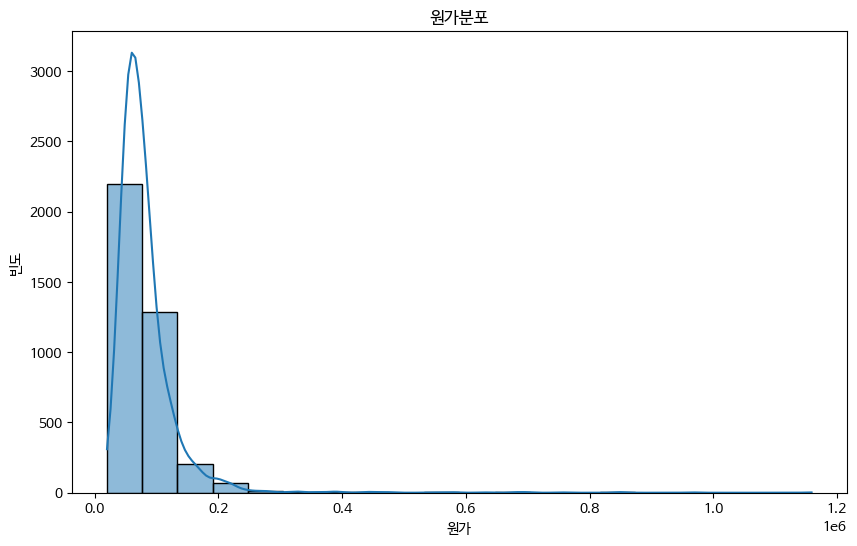

In [ ]:
# 1. 원가 및 할인가 분석
# 원가 분포
plt.figure(figsize=(10, 6))
sns.histplot(df['원가'], bins=20, kde=True)
plt.title('원가분포')
plt.xlabel('원가')
plt.ylabel('빈도')
plt.show()

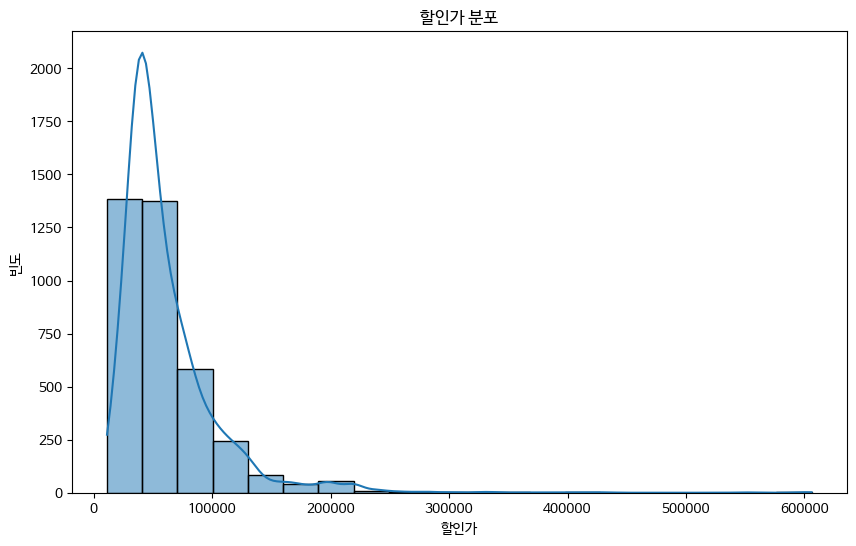

In [ ]:
# 할인가 분포
plt.figure(figsize=(10, 6))
sns.histplot(df['할인가'], bins=20, kde=True)
plt.title('할인가 분포')
plt.xlabel('할인가')
plt.ylabel('빈도')
plt.show()

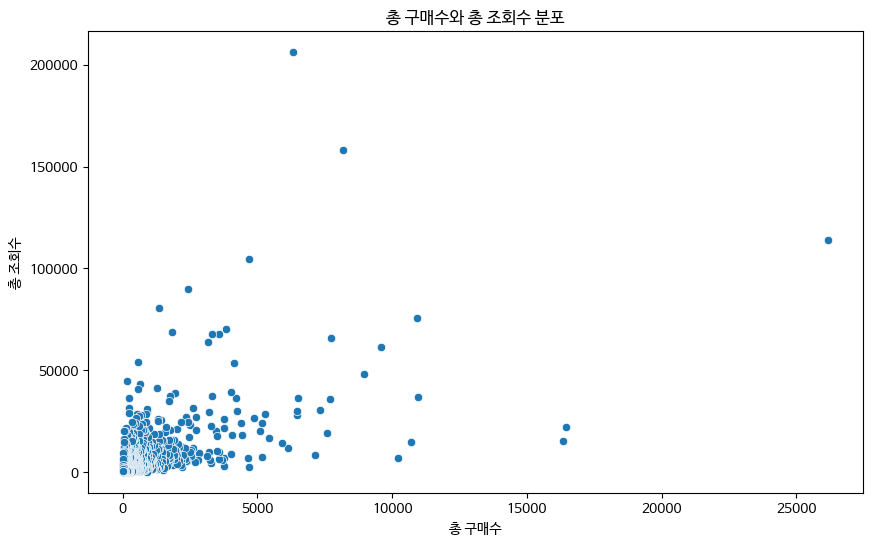

In [ ]:
# 2. 총 구매수 및 총 조회수 분석
# 총 구매수 및 총 조회수 분포
# -> 총 구매수가 총 조회수에 영향을 미친다면, 산접도는 오른쪽 위로 향하는 경행
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='총구매수', y='총조회수')
plt.title('총 구매수와 총 조회수 분포')
plt.xlabel('총 구매수')
plt.ylabel('총 조회수')
plt.show()

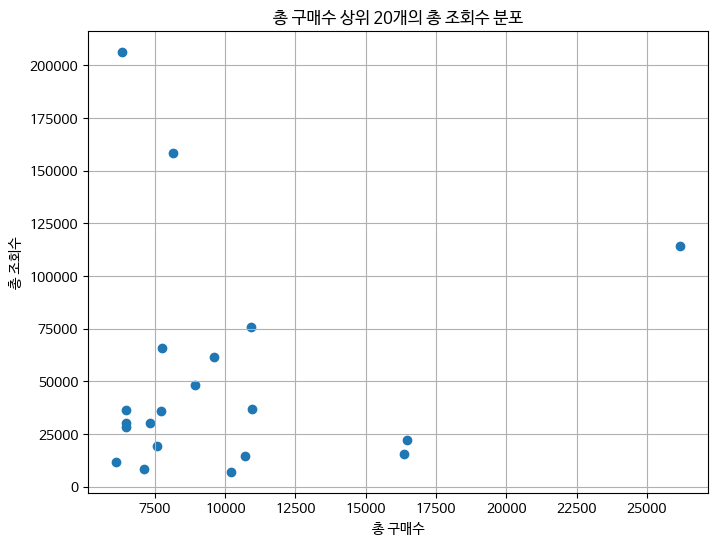

In [ ]:
#총 구매수와 총 조회수의 관계 파악
# 총 구매수를 기준으로 내림차순 정렬 후 상위 20개 데이터 추출
top_20_df = df2.sort_values(by='총구매수', ascending=False).head(20)

# 산점도 시각화
plt.figure(figsize=(8, 6))
plt.scatter(top_20_df['총구매수'], top_20_df['총조회수'])
plt.title('총 구매수 상위 20개의 총 조회수 분포')
plt.xlabel('총 구매수')
plt.ylabel('총 조회수')
plt.grid(True)
plt.show()

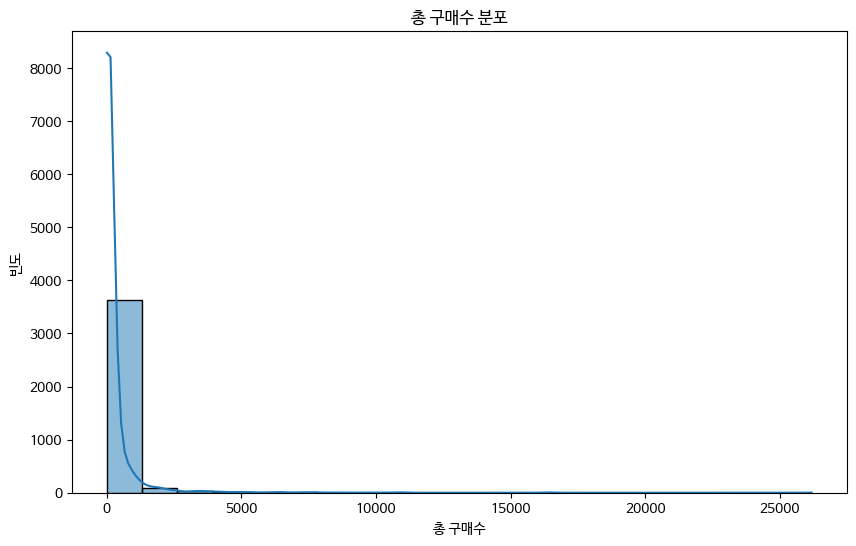

In [ ]:
# 총구매수 분포
plt.figure(figsize=(10, 6))
sns.histplot(df['총구매수'], bins=20, kde=True)
plt.title('총 구매수 분포')
plt.xlabel('총 구매수')
plt.ylabel('빈도')
plt.show()

## 상품 전체 태그 분포 (워드클라우드 글꼴 해결해야됨)

In [ ]:
pip install wordcloud matplotlib

In [ ]:
plt.rc('font', family='NanumGothic')        # For Windows

print(plt.rcParams['font.family'])

['NanumGothic']


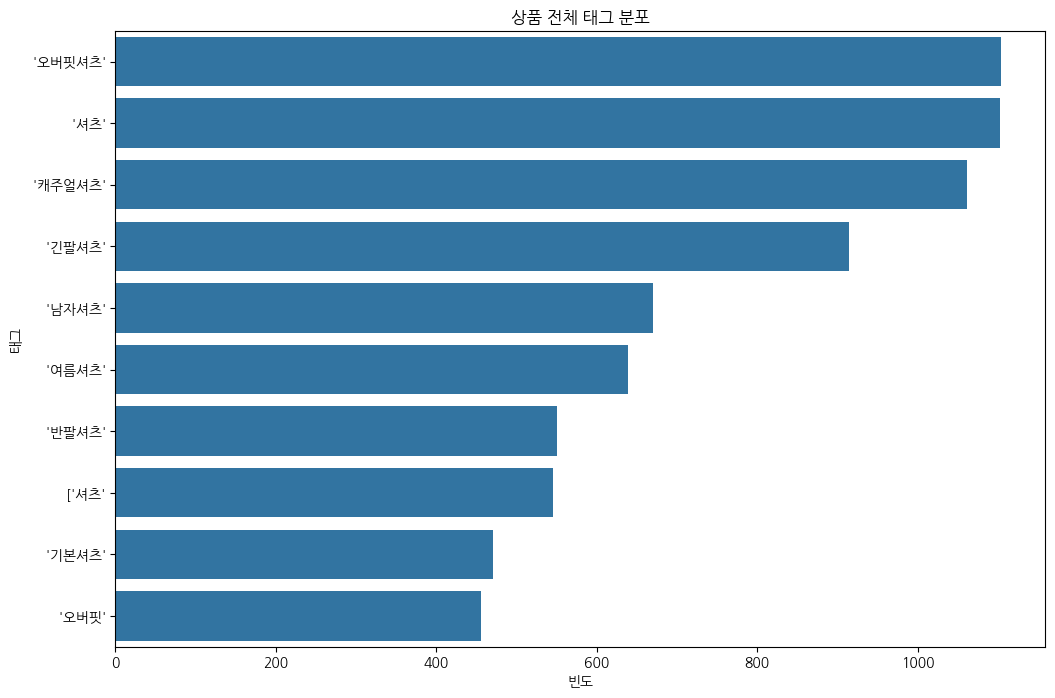

FileNotFoundError: [Errno 2] No such file or directory: '/content/C:/Windows/Fonts/나눔고딕/NanumGothicLight.ttf'

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.font_manager as fm

# 태그 분리 및 빈도수 계산
all_tags = df2['태그'].str.split(',').explode()
tag_counts = Counter(all_tags)

# 상위 10개의 태그 선택
top_n = 10
top_tags = tag_counts.most_common(top_n)

# 막대 그래프로 시각화
top_tags_df = pd.DataFrame(top_tags, columns=['태그', '빈도수'])
plt.figure(figsize=(12, 8))
sns.barplot(data=top_tags_df, x='빈도수', y='태그')
plt.title('상품 전체 태그 분포')
plt.xlabel('빈도')
plt.ylabel('태그')
plt.show()

# 한글 폰트 경로 (예: Windows에서 Malgun Gothic 폰트 경로)
font_path = 'C:/Windows/Fonts/나눔고딕/NanumGothicLight.ttf'  # 시스템에 따라 경로 조정

# 폰트 설정
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 워드 클라우드 생성
wordcloud = WordCloud(font_path=font_path, background_color='white', width=800, height=400)
wordcloud = wordcloud.generate_from_frequencies(tag_counts)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear', font_path = font_path).generate_from_frequencies(text)
plt.axis('off')
plt.title('Tag Word Cloud')
plt.show()

## .

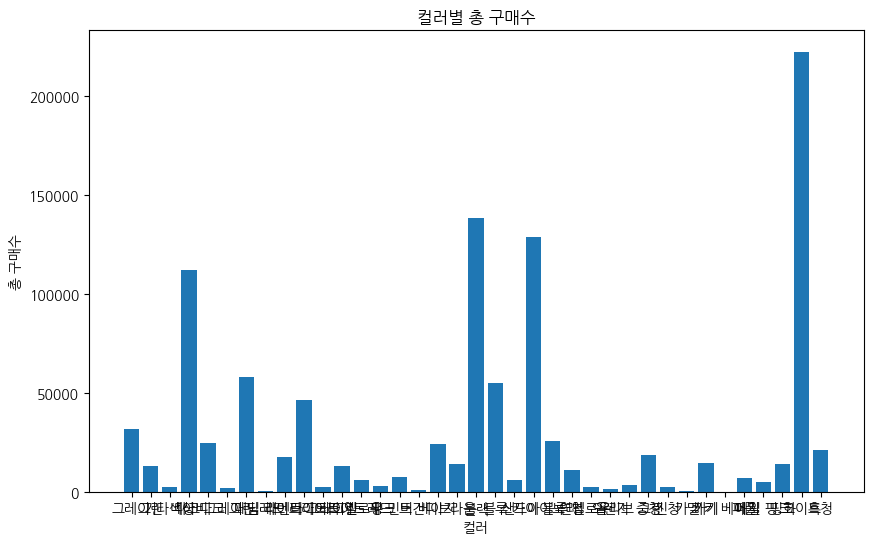

In [ ]:
#색상 분포 40개
# 컬러별 총구매수 시각화 -> 근데 이건 기준을 브랜드별 혹은 상품별로 해야하나?
import matplotlib.pyplot as plt

# 컬러별로 총 구매수 합산
color_purchase_sum = df.groupby('컬러')['총구매수'].sum().reset_index()

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
plt.bar(color_purchase_sum['컬러'], color_purchase_sum['총구매수'])
plt.title('컬러별 총 구매수')
plt.xlabel('컬러')
plt.ylabel('총 구매수')
plt.show()

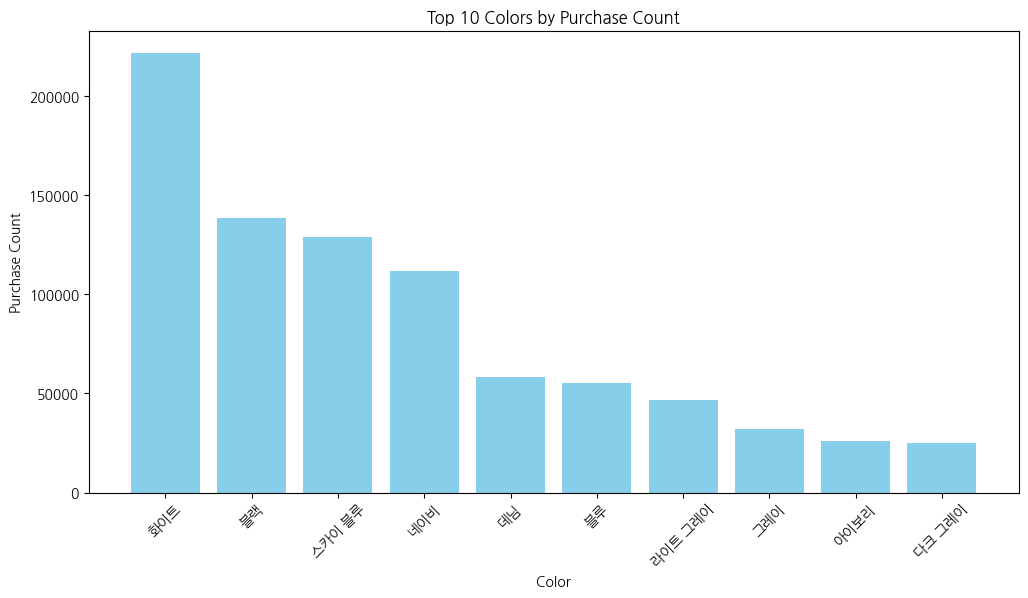

In [ ]:
# 상위 10개의 컬러 추출
top_colors = df2.groupby('컬러')['총구매수'].sum().nlargest(10)

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(top_colors.index, top_colors.values, color='skyblue')
plt.title('Top 10 Colors by Purchase Count')
plt.xlabel('Color')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45)
plt.show()

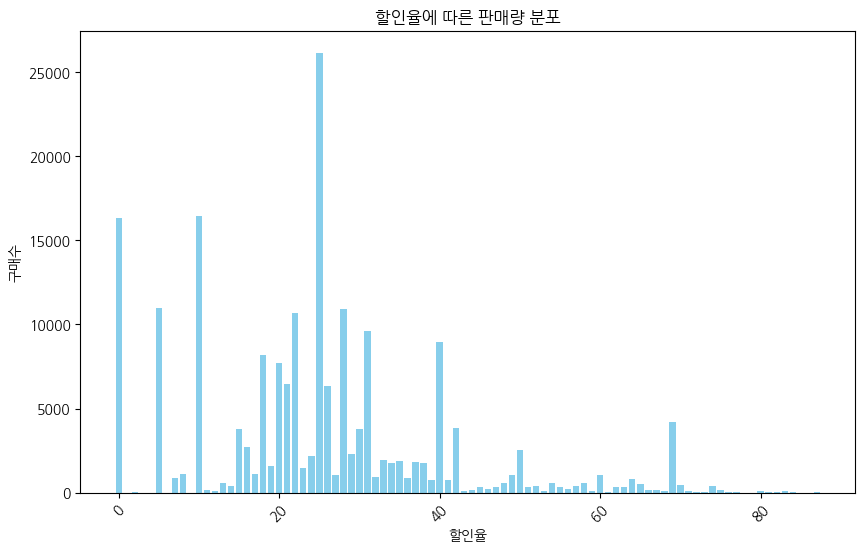

In [ ]:
# 할인율에 따른 판매량 분포 - 막대
import matplotlib.pyplot as plt

# 총 구매수가 상위 10개인 제품 필터링
#top_10_products = df2.nlargest(10, '총구매수')

plt.figure(figsize=(10, 6))
plt.bar(df2['할인율'], df2['총구매수'], color='skyblue')
plt.title('할인율에 따른 판매량 분포')
plt.xlabel('할인율')
plt.ylabel('구매수')
plt.xticks(rotation=45)
plt.show()


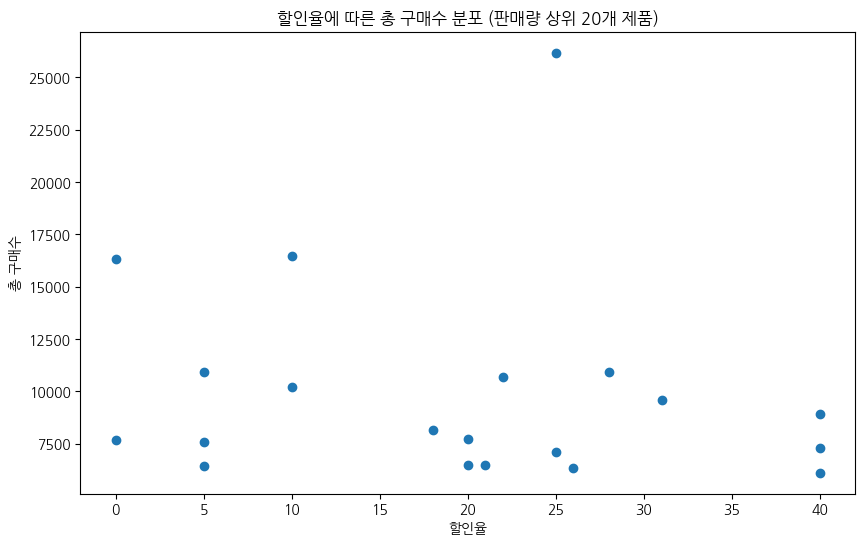

In [ ]:
# 할인율에 따른 판매량 분포 - 막대, 상위 10개
import matplotlib.pyplot as plt

# 총 구매수가 상위 10개인 제품 필터링
top_10_products = df2.nlargest(20, '총구매수')

# 할인율에 따른 판매량 분포 시각화
plt.figure(figsize=(10, 6))
plt.scatter(top_10_products['할인율'], top_10_products['총구매수'])
plt.title('할인율에 따른 총 구매수 분포 (판매량 상위 20개 제품)')
plt.xlabel('할인율')
plt.ylabel('총 구매수')
plt.show()

#-> 관계없는 듯한 결과..

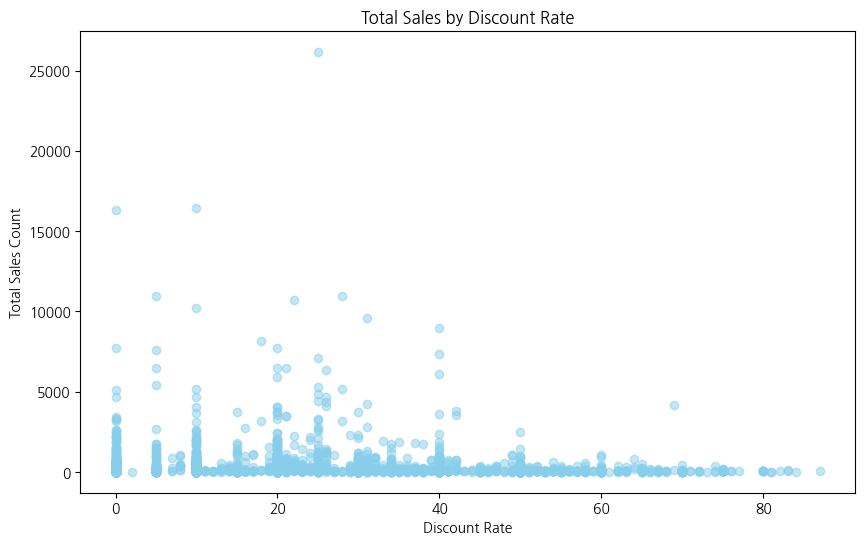

In [ ]:
# 할인율에 따른 판매량 분포 - 산점도
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df2['할인율'], df2['총구매수'], color='skyblue', alpha=0.5)
plt.title('Total Sales by Discount Rate')
plt.xlabel('Discount Rate')
plt.ylabel('Total Sales Count')
plt.show()

#이정도라면 인기없는 상품의 할인율을 높여도 고객 구매가 없었던 것 아닌가..?

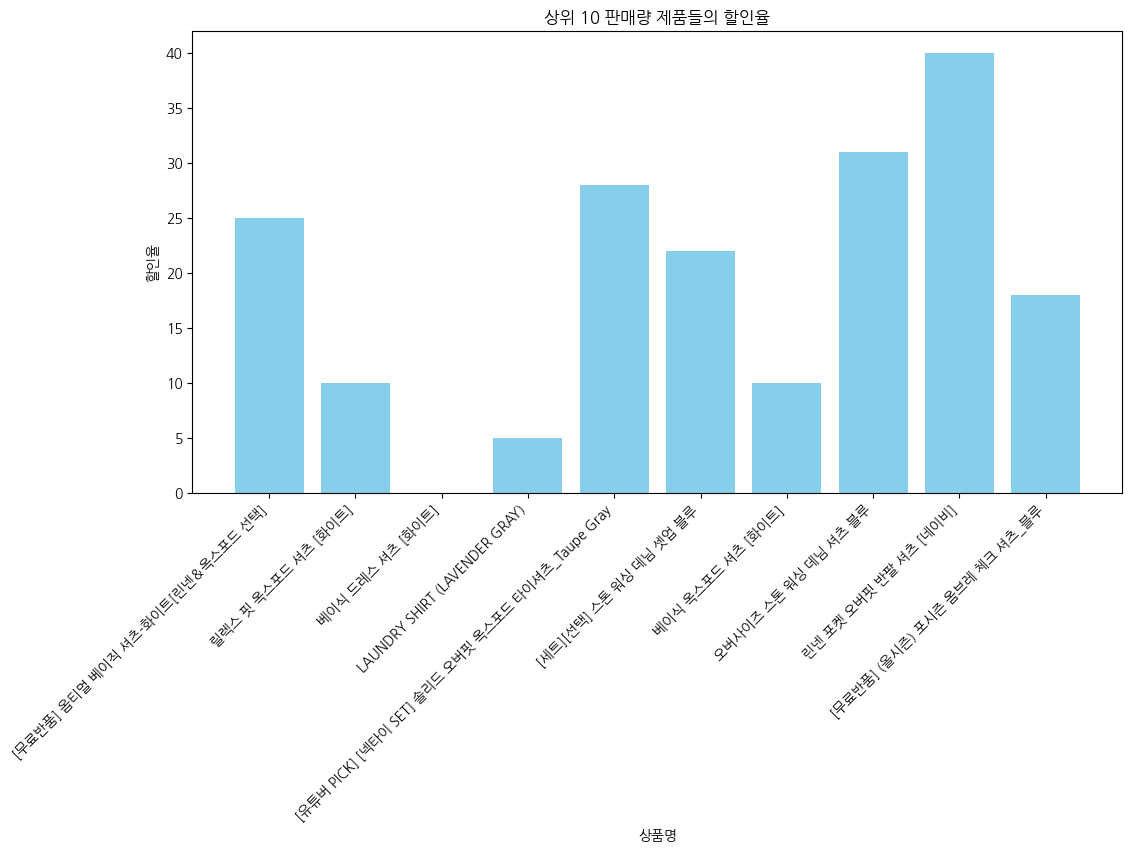

In [ ]:
# 상위 판매량 제품 추출 및 할인율 시각화
top_n = 10  # 상위 5개 제품 예시
top_sales_products = df2.nlargest(top_n, '총구매수')

# 상위 판매량 제품들의 할인율 도출
top_sales_discount_rates = top_sales_products[['제품명', '할인율', '총구매수']]

# 할인율 기준으로 데이터프레임 정렬-> **정렬 어케함?
#sorted_top_sales_discount_rates = top_sales_discount_rates.sort_values(by='총구매수', ascending=False)

# 시각화 - 상위 판매량 제품들의 할인율
plt.figure(figsize=(12, 6))
plt.bar(top_sales_discount_rates['제품명'], top_sales_discount_rates['할인율'], color='skyblue')
plt.title(f'상위 {top_n} 판매량 제품들의 할인율')
plt.xlabel('상품명')
plt.ylabel('할인율')
plt.xticks(rotation=45, ha='right')
plt.show()

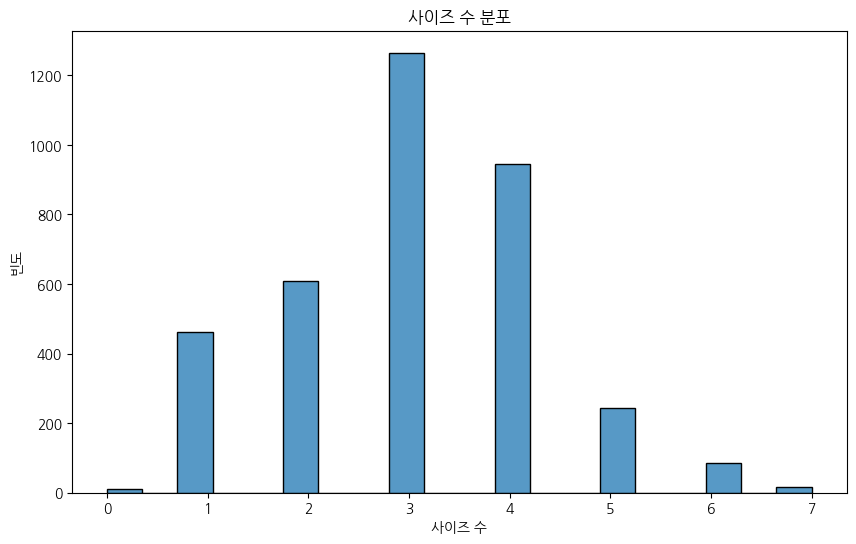

In [ ]:
# 사이즈 개수 분포
plt.figure(figsize=(10, 6))
sns.histplot(df['사이즈 수'], bins=20, edgecolor='black', stat='count')
plt.title('사이즈 수 분포')
plt.xlabel('사이즈 수')
plt.ylabel('빈도')
plt.show()

# 브랜드 EDA

## 브랜드 좋아요수 조인

In [ ]:
# 합칠 CSV 파일 읽기
df = pd.read_csv('/content/drive/MyDrive/ML팀플/brand.csv')
df

,브랜드,제품개수,총조회수,총조회수_평균,브랜드_카테고리,브랜드_카테고리_인코딩
0,얼킨 캔버스,2,43431.0,21715.500,스트릿,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
1,하드코어 해피니스,3,57795.0,19265.000,여성_캐주얼,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]"
2,시그니처,5,89651.0,17930.200,포멀,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"
3,마리끌레르,1,17299.0,17299.000,영_캐주얼,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
4,어커버,8,134861.0,16857.625,베이식,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...
476,에즈이프 캘리,1,116.0,116.000,영_캐주얼,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
477,배드블러드,1,113.0,113.000,스트릿,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]"
478,토템,1,109.0,109.000,컨템포러리,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
479,베이직코튼,1,107.0,107.000,영_캐주얼,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"


In [ ]:
# 현재 데이터프레임 파일 경로
file2 = '/content/drive/MyDrive/ML팀플/musinsa_brand_info.csv의 사본'

# 합칠 CSV 파일 읽기
df2 = pd.read_csv(file2)
df2

,Unnamed: 0,브랜드,브랜드_내용,브랜드 좋아요 수
0,0,시그니처,시그니처(SIGNATURE)는 창의적이고 다면적인 디자인요소를 각각의 아이템에 담아...,78305
1,1,이스트서비스샵,이스트서비스샵(EAST SERVICE SHOP)은 'SERVING FOR ONLY ...,16466
2,2,디앤에스알,"디앤에스알(DNSR)는 'Do New things, Something to real...",61242
3,3,나이스고스트클럽,나이스고스트클럽(NICEGHOSTCLUB)은 친절한 유령들의 클럽이라는 키치한 의미...,189134
4,4,노컨텐츠,노컨텐츠(NOCONTENT)는 모든 이들이 아름다운 것들을 사랑하며 아름다운 사람이...,10924
...,...,...,...,...
520,520,하프크라이즈 레이아웃,하프크라이즈 레이아웃(HALBKREIS LAYOUT)은 빈티지&미니멀리즘을 기반으로...,40040
521,521,세터,세터(SATUR)는 '토요일을 선물하세요'라는 슬로건을 바탕으로 2020년 서울에서...,142505
522,522,블랙브라운,블랙브라운(BLACKBROWN)은 이탈리아 감성의 클래식한 비즈니스 캐주얼 브랜드로...,303
523,523,플레어업,FLAREUP(플레어업)은 순식간에 타오르고 소멸해버리는 최근 트렌드의 가변성(可變...,23038


In [ ]:
# 브랜드 좋아요 수를 조인하여 df2에 추가
merged_df = df.merge(df2, on='브랜드', how='left', suffixes=('_df', '_df2'))
merged_df

,브랜드,제품개수,총조회수,총조회수_평균,브랜드_카테고리,브랜드_카테고리_인코딩,Unnamed: 0,브랜드_내용,브랜드 좋아요 수
0,얼킨 캔버스,2,43431.0,21715.500,스트릿,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",272,얼킨 캔버스(ULKIN CANVAS)는 다양한 분야의 가치 있는 비주얼 라이선스를 ...,36427
1,하드코어 해피니스,3,57795.0,19265.000,여성_캐주얼,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",517,하드코어 해피니스(HARDCORE HAPPINESS)는 캐주얼 웨어에 하이엔드 디자...,28536
2,시그니처,5,89651.0,17930.200,포멀,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",0,시그니처(SIGNATURE)는 창의적이고 다면적인 디자인요소를 각각의 아이템에 담아...,78305
3,마리끌레르,1,17299.0,17299.000,영_캐주얼,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",7,마리끌레르(MARIE CLAIRE)는 1954년 프랑스에서 시작되어 전 세계 여성들...,5782
4,어커버,8,134861.0,16857.625,베이식,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",387,어커버(ACOVER)는 각기 다른 사람들이 모여 즐거움이라는 하나의 코드를 지향점으...,62046
...,...,...,...,...,...,...,...,...,...
476,에즈이프 캘리,1,116.0,116.000,영_캐주얼,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",101,"에즈이프캘리(AS IF CALIE)는 캘리포니아의 자유로운 무드를 기반으로, 매 시...",29249
477,배드블러드,1,113.0,113.000,스트릿,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",440,배드블러드(BADBLOOD)는 트렌디하면서 즐거운 삶을 추구하는 사람들을 위한 브랜...,78116
478,토템,1,109.0,109.000,컨템포러리,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",27,토템(TOTEME)은 패션 블로거이자 에디터였던 엘린 클링(Elin Kling)과 ...,4285
479,베이직코튼,1,107.0,107.000,영_캐주얼,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",124,BASIC COTTON(베이직코튼)은 베이직한 아이템에 모던하고 큐트한 감성을 믹스...,7102


In [ ]:
df = merged_df.drop(columns=['Unnamed: 0','브랜드_내용'])
df

,브랜드,제품개수,총조회수,총조회수_평균,브랜드_카테고리,브랜드_카테고리_인코딩,브랜드 좋아요 수
0,얼킨 캔버스,2,43431.0,21715.500,스트릿,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",36427
1,하드코어 해피니스,3,57795.0,19265.000,여성_캐주얼,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",28536
2,시그니처,5,89651.0,17930.200,포멀,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",78305
3,마리끌레르,1,17299.0,17299.000,영_캐주얼,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",5782
4,어커버,8,134861.0,16857.625,베이식,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",62046
...,...,...,...,...,...,...,...
476,에즈이프 캘리,1,116.0,116.000,영_캐주얼,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",29249
477,배드블러드,1,113.0,113.000,스트릿,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",78116
478,토템,1,109.0,109.000,컨템포러리,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",4285
479,베이직코튼,1,107.0,107.000,영_캐주얼,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",7102


In [ ]:
# CSV 파일로 저장
df.to_csv('brand.csv', index=False)

df = pd.read_csv('/content/brand.csv')
df

,브랜드,제품개수,총조회수,총조회수_평균,브랜드_카테고리,브랜드_카테고리_인코딩,브랜드 좋아요 수
0,얼킨 캔버스,2,43431.0,21715.500,스트릿,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",36427
1,하드코어 해피니스,3,57795.0,19265.000,여성_캐주얼,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",28536
2,시그니처,5,89651.0,17930.200,포멀,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",78305
3,마리끌레르,1,17299.0,17299.000,영_캐주얼,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",5782
4,어커버,8,134861.0,16857.625,베이식,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",62046
...,...,...,...,...,...,...,...
476,에즈이프 캘리,1,116.0,116.000,영_캐주얼,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",29249
477,배드블러드,1,113.0,113.000,스트릿,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]",78116
478,토템,1,109.0,109.000,컨템포러리,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",4285
479,베이직코튼,1,107.0,107.000,영_캐주얼,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",7102


## eda

In [ ]:
#브랜드의 수가 많으니까 복잡하지 않게 잘 시각화
#각 변수별 상위 브랜드 추출?

### 총 조회수

In [ ]:
#총 조회수 상위 10개 브랜드
top_10_brand_total_views = df.groupby('브랜드')['총조회수'].sum().nlargest(10)
top_10_brand_total_views

브랜드
무신사 스탠다드    1109149.0
필루미네이트       694503.0
라퍼지스토어       685273.0
파르티멘토        441524.0
디미트리블랙       367879.0
트릴리온         334042.0
폴로 랄프 로렌     310978.0
드로우핏         276195.0
유니온블루        271435.0
굿라이프웍스       222269.0
Name: 총조회수, dtype: float64

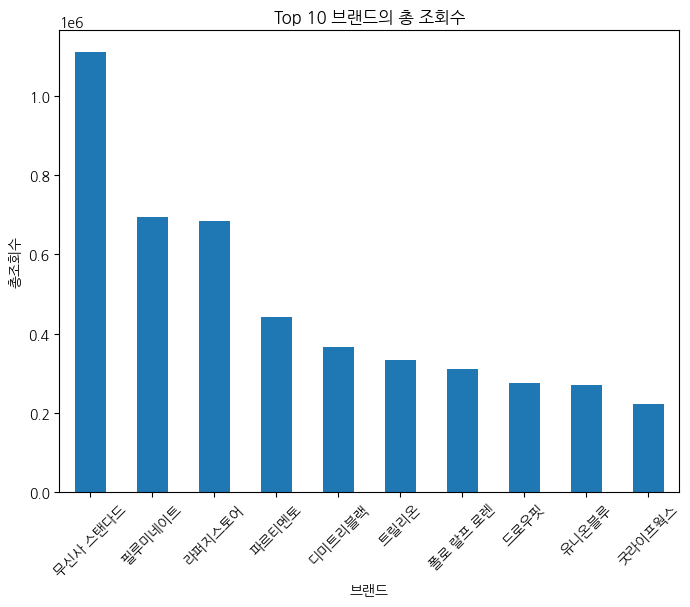

In [ ]:
#시각화
plt.figure(figsize=(8, 6))
top_10_brand_total_views.plot(kind='bar')
plt.title('Top 10 브랜드의 총 조회수')
plt.xlabel('브랜드')
plt.ylabel('총조회수')
plt.xticks(rotation=45)
plt.show()

### 총조회수_평균

In [ ]:
top_10_brand_avg_views = df.groupby('브랜드')['총조회수_평균'].mean().nlargest(10)
top_10_brand_avg_views

브랜드
얼킨 캔버스       21715.500000
하드코어 해피니스    19265.000000
시그니처         17930.200000
마리끌레르        17299.000000
어커버          16857.625000
필루미네이트       15433.400000
디미트리블랙       14149.192308
밈더워드로브       13464.142857
슈퍼서브         12190.750000
언더오프         11910.500000
Name: 총조회수_평균, dtype: float64

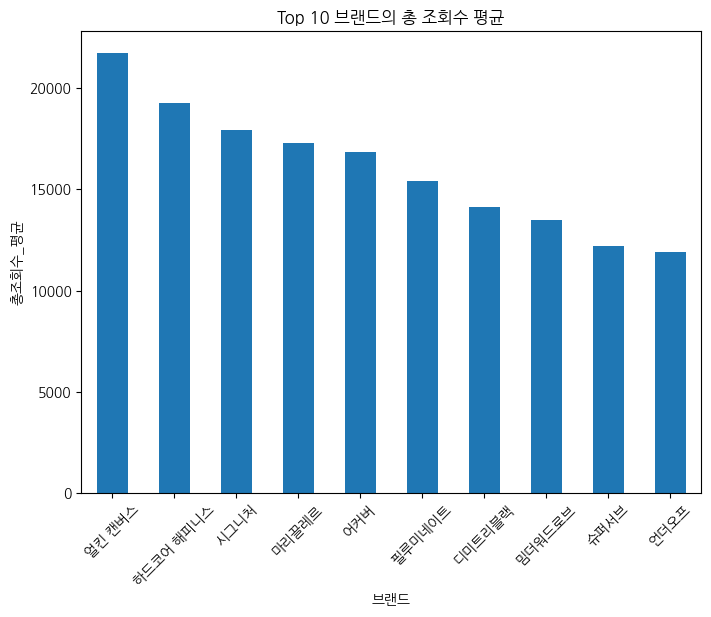

In [ ]:
top_10_brand_avg_views = df.groupby('브랜드')['총조회수_평균'].mean().nlargest(10)

# 시각화
plt.figure(figsize=(8, 6))
top_10_brand_avg_views.plot(kind='bar')
plt.title('Top 10 브랜드의 총 조회수 평균')
plt.xlabel('브랜드')
plt.ylabel('총조회수_평균')
plt.xticks(rotation=45)
plt.show()

### 카테고리 분포

In [ ]:
top_10_brand_category = df['브랜드_카테고리'].value_counts().head(10)
top_10_brand_category

브랜드_카테고리
포멀          134
영_캐주얼        92
스트릿          91
여성_캐주얼       57
베이식          31
컨템포러리        29
트래디셔널        13
스포츠_아웃도어      5
럭셔리           5
골프            1
Name: count, dtype: int64

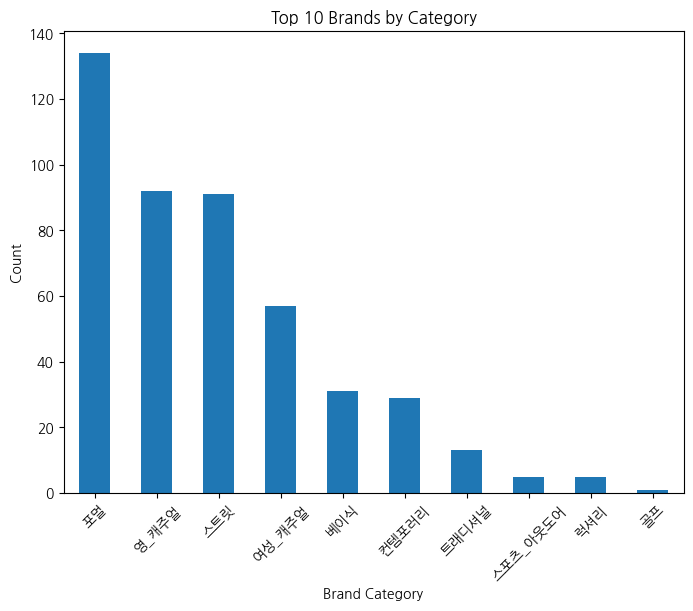

In [ ]:
# 시각화 - 카테고리 분포
plt.figure(figsize=(8, 6))
top_10_brand_category.plot(kind='bar')
plt.title('Top 10 Brands by Category')
plt.xlabel('Brand Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 카테고리별 제품 수

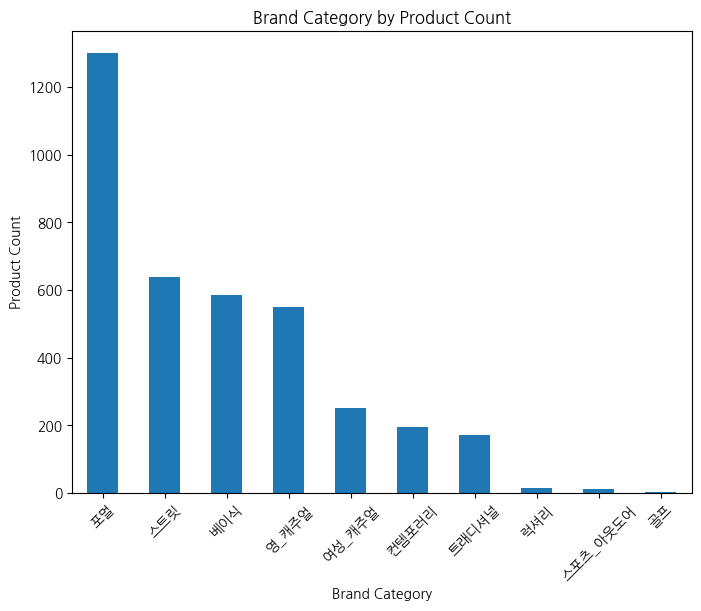

In [ ]:
# 브랜드 카테고리별 제품 개수 계산
brand_category_product_count = df.groupby('브랜드_카테고리')['제품개수'].sum().nlargest(10)

# 시각화
plt.figure(figsize=(8, 6))
brand_category_product_count.plot(kind='bar')
plt.title('Brand Category by Product Count')
plt.xlabel('Brand Category')
plt.ylabel('Product Count')
plt.xticks(rotation=45)
plt.show()

### 좋아요수

In [ ]:
top_10_brand_likes = df.groupby('브랜드')['브랜드 좋아요 수'].sum().nlargest(10)
top_10_brand_likes

브랜드
무신사 스탠다드    734049
커버낫         359458
디스이즈네버댓     325467
라퍼지스토어      318462
나이키         310391
예일          277005
코드그라피       275685
와릿이즌        273146
컨버스         234678
엘엠씨         225804
Name: 브랜드 좋아요 수, dtype: int64

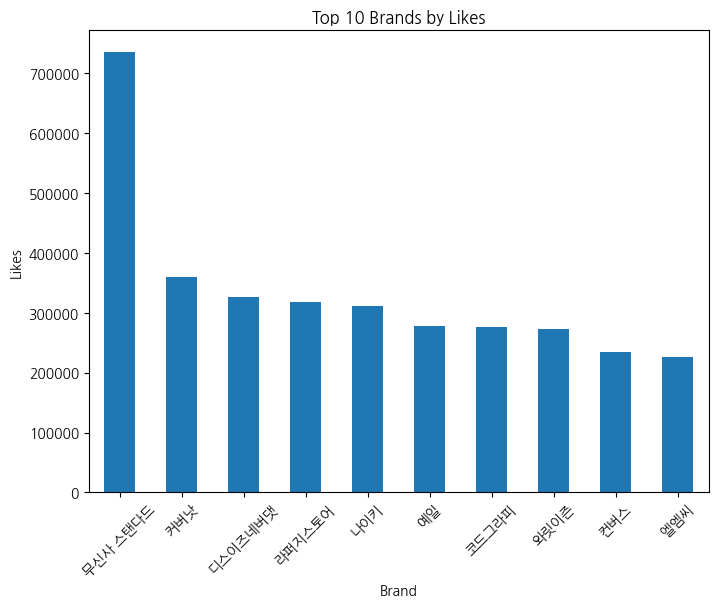

In [ ]:
# 시각화
plt.figure(figsize=(8, 6))
top_10_brand_likes.plot(kind='bar')
plt.title('Top 10 Brands by Likes')
plt.xlabel('Brand')
plt.ylabel('Likes')
plt.xticks(rotation=45)
plt.show()

### 카테고리별 총조회수

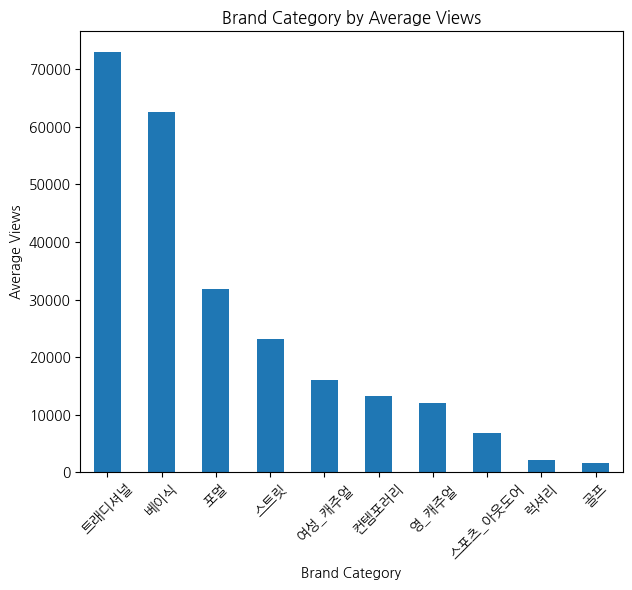

In [ ]:
# 브랜드 카테고리별 총조회수
brand_category_avg_views = df.groupby('브랜드_카테고리')['총조회수'].mean().nlargest(10)

# 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
brand_category_avg_views.plot(kind='bar')
plt.title('Brand Category by Average Views')
plt.xlabel('Brand Category')
plt.ylabel('Average Views')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
